#Some Python examples

##Load data

In [103]:
from azureml import Workspace
ws = Workspace(
    workspace_id='be61456bd29047529d24a146a9cb6233',
    authorization_token='2652318930204669ac2bff77d523c284',
    endpoint='https://studioapi.azureml.net'
)
ds = ws.datasets['iris.csv']

import pandas as pd
frame = ds.to_dataframe()
iris=pd.DataFrame(frame,columns=['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width','Species'])
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


##Summary data

In [22]:
print set(iris['Species'])

set([u'setosa', u'versicolor', u'virginica'])


##Plot data

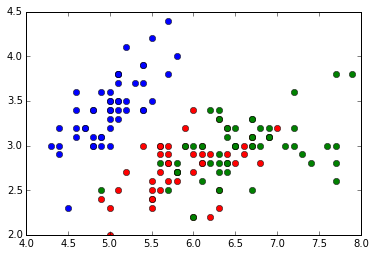

In [109]:
from pylab import *
cols=['bo','ro','go']
i=0
for spec in set(iris['Species']):
    plot(iris.loc[iris['Species']==spec,'Sepal.Length'],iris.loc[iris['Species']==spec,'Sepal.Width'],cols[i])
    i=i+1
show()


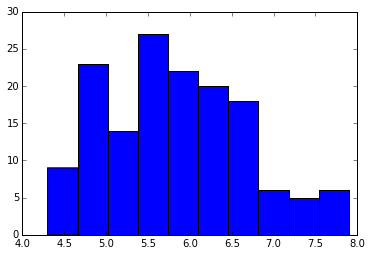

In [66]:
hist(iris['Sepal.Length'])
show()

In [224]:
import random
iris['Target']=zeros(len(iris["Species"]))
iris.loc[iris.Species=='setosa','Target']=np.random.random_integers(0,1,len(iris['Target']+1))

iris.head()

/home/nbcommon/env/lib/python2.7/site-packages/pandas/core/internals.py:648: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.
  values[indexer] = value


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


# Random Forest

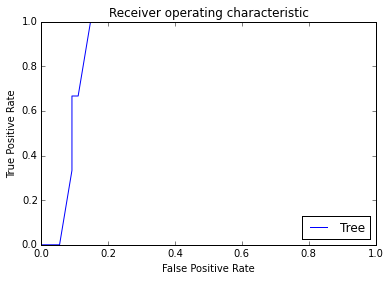

In [313]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

rows = random.sample(iris.index, int(len(iris.index)*0.6))
dat=iris.ix[:,0:3]
training = dat.ix[rows]
validation=dat.drop(rows)                    
                     
y_train=iris.Target[rows]
y_val=iris.Target.drop(rows)


clf = RandomForestClassifier(max_depth=None, min_samples_split=1,random_state=0)
clf = clf.fit(training, y_train)

tree_probas = clf.predict_proba(validation)
tree_fpr, tree_tpr, tree_thresholds = roc_curve(y_val,
tree_probas[:, 1])

plot(tree_fpr, tree_tpr, label='Tree')
xlabel('False Positive Rate')
ylabel('True Positive Rate')
title('Receiver operating characteristic')
legend(loc="lower right")
show()


res=validation
res['Predict']=clf.predict(validation)
res['Target']=y_val



In [314]:
res





,Sepal.Length,Sepal.Width,Petal.Length,Predict,Target
0,5.1,3.5,1.4,0,0
6,4.6,3.4,1.4,1,0
7,5.0,3.4,1.5,0,1
12,4.8,3.0,1.4,1,0
21,5.1,3.7,1.5,1,1
24,4.8,3.4,1.9,1,0
27,5.2,3.5,1.5,0,0
28,5.2,3.4,1.4,0,1
32,5.2,4.1,1.5,1,1
38,4.4,3.0,1.3,1,1
